# 05_A_Software_Comparison_PointCloud

In diesem Jupyter Notebook werden die Punkwolken der Softwareprodukte "Agisoft Metashape" und "Drone2Map" miteinander verglichen. 
Die Daten basieren auf Bilder der DJI Mini 3 Pro von den folgenden Aufnahmetagen:
11.03.2025 

### Import der Libraries

In [1]:
import pandas as pd
import os
from IPython.display import display, HTML
import matplotlib.cm as cm
import numpy as np
import laspy
from tqdm.notebook import tqdm
from matplotlib.ticker import FuncFormatter
import pandas as pd
import matplotlib.pyplot as plt

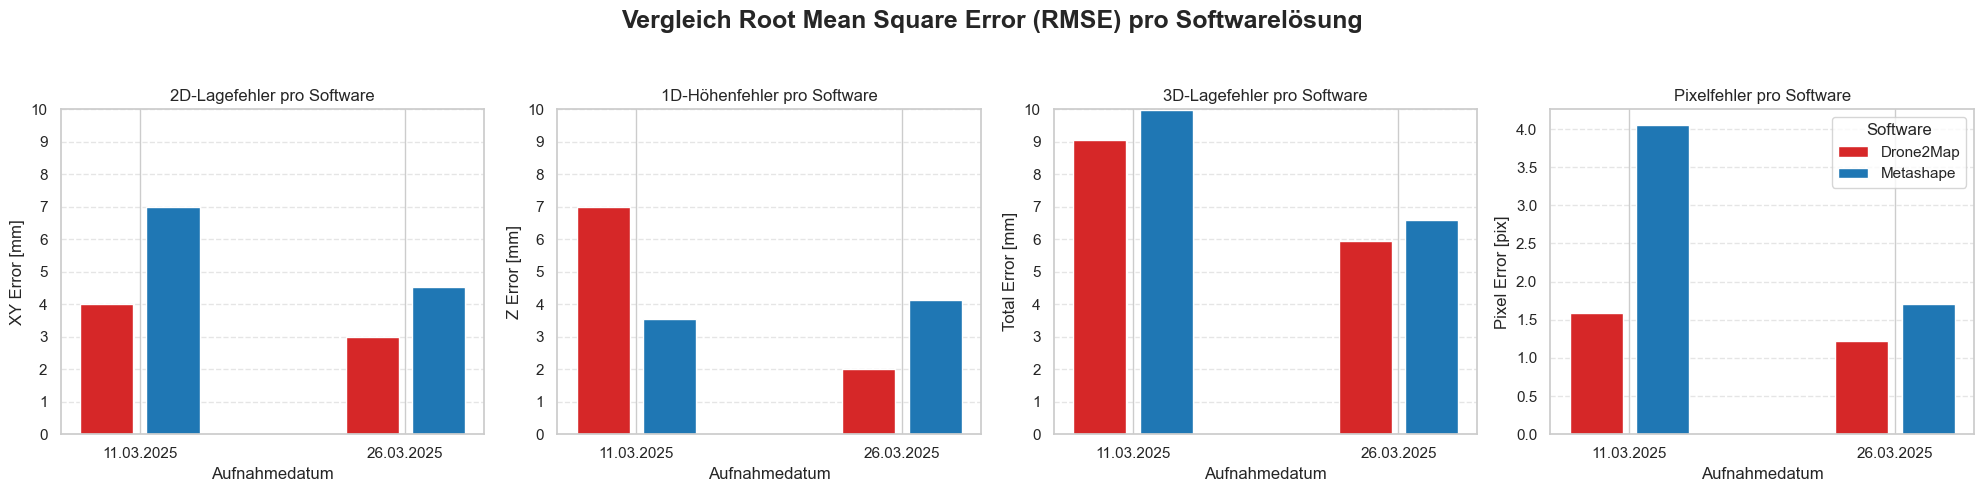

In [44]:
# CSV einlesen
df = pd.read_csv(r"C:\_Data\BTh11\BTh11_Trieblaengenwachstum\05_Software_Comparison\50_BaseData\CSV\SfM_Reports_RMSE_Values.csv")

# Farben definieren
farbe = {"Drone2Map": "#d62728", "Metashape": "#1f77b4"}

# Parameter
bar_width = 0.2 
bar_spacing = 0.05
category_spacing = 0.0000005

# Datum extrahieren + formatieren
df["Datum_raw"] = df["Aufnahme_ID"].str.extract(r"(2025\d{4})")[0]
df["Datum"] = pd.to_datetime(df["Datum_raw"], format="%Y%m%d").dt.strftime("%d.%m.%Y")

# Attribut-Konfiguration: (Spalte, Y-Achsen-Label, Titel)
attributes = [
    ("RMSE_X_mm", "XY Error [mm]", "2D-Lagefehler pro Software"),
    ("RMSE_Z_mm", "Z Error [mm]", "1D-Höhenfehler pro Software"),
    ("RMSE_Total_mm", "Total Error [mm]", "3D-Lagefehler pro Software"),
    ("RMSE_Pixel", "Pixel Error [pix]", "Pixelfehler pro Software")
]

# x-Achsen-Konfiguration
aufnahmedaten = df["Datum"].unique()
x_indices = np.arange(len(aufnahmedaten)) * (1 + category_spacing)

# Einheitliche Y-Achse für 3D-Werte
ymin, ymax = 0, 10

# Subplots
fig, axes = plt.subplots(1, len(attributes), figsize=(20, 5))


for ax, (attr, ylabel, title) in zip(axes, attributes):
    for i, datum in enumerate(aufnahmedaten):
        for j, software in enumerate(["Drone2Map", "Metashape"]):
            value = df[(df["Datum"] == datum) & (df["Software"] == software)][attr]
            if not value.empty:
                xpos = x_indices[i] + (j - 0.5) * (bar_width + bar_spacing)
                ax.bar(xpos, value.values[0], width=bar_width, color=farbe[software])
    
    # Achsen
    ax.set_xticks(x_indices)
    ax.set_xticklabels(aufnahmedaten, rotation=0)
    ax.set_xlabel("Aufnahmedatum")
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    if attr != "RMSE_Pixel":
        ax.set_ylim(ymin, ymax)
        ax.set_yticks(np.arange(ymin, ymax + 1, 1))
    ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legende (einmalig)
axes[3].legend(farbe.keys(), title="Software", loc="upper right")

# Gesamttitel
fig.suptitle("Vergleich Root Mean Square Error (RMSE) pro Softwarelösung", fontsize=18, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()